In [44]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import warnings
import datetime
import glob
%matplotlib inline

#set default plot characterstics and colors
from matplotlib import rcParams

In [2]:
summer2015 = pd.read_csv('C:/Users/Sammauel/Documents/Github/citi-bike-data/summer2015/summer_2015_with_roundtrip.csv')
summer2015.head()

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,roundtrip
0,0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1,0
1,1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1,0
2,2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1,0
3,3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1,0
4,4,690,6/1/2015 0:03,6/1/2015 0:15,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,410,Suffolk St & Stanton St,40.720664,-73.985180,20857,Subscriber,1976.0,1,0


In [3]:
summer2016 = pd.read_csv('C:/Users/Sammauel/Documents/Github/citi-bike-data/summer2016/summer_2016_with_roundtrip.csv')
summer2016.head()

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,roundtrip
0,0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,0
1,1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,0
2,2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,0
3,3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,0
4,4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,0


In [4]:
##Change to plt.bar

num_rides = len(summer2015)
num_female = len(summer2015[summer2015['gender'] == 2])
percent_female = (num_female / num_rides) * 100
num_male = len(summer2015[summer2015['gender'] == 1])
percent_male = (num_male / num_rides) * 100
print(("Our summer 2015 data set has %d rides, " +
      "of which %.2f%% (%d) are female and %.2f%% (%d) are male") % (
        len(summer2015), percent_female, num_female, percent_male, num_male))

num_rides1 = len(summer2016)
num_female1 = len(summer2016[summer2016['gender'] == 2])
percent_female1 = (num_female1 / num_rides1) * 100
num_male1 = len(summer2016[summer2016['gender'] == 1])
percent_male1 = (num_male1 / num_rides1) * 100
print(("Our summer 2016 data set has %d rides, " +
      "of which %.2f%% (%d) are female and %.2f%% (%d) are male") % (
        len(summer2016), percent_female1, num_female1, percent_male1, num_male1))



Our summer 2015 data set has 2674200 rides, of which 23.99% (641657) are female and 75.89% (2029573) are male
Our summer 2016 data set has 3439753 rides, of which 24.61% (846607) are female and 73.93% (2543026) are male


In [68]:
#(df.loc[df['A'] == 'foo'])
#summer2015.loc[summer2015['start station name'] == 'W 21 St & 6 Ave']

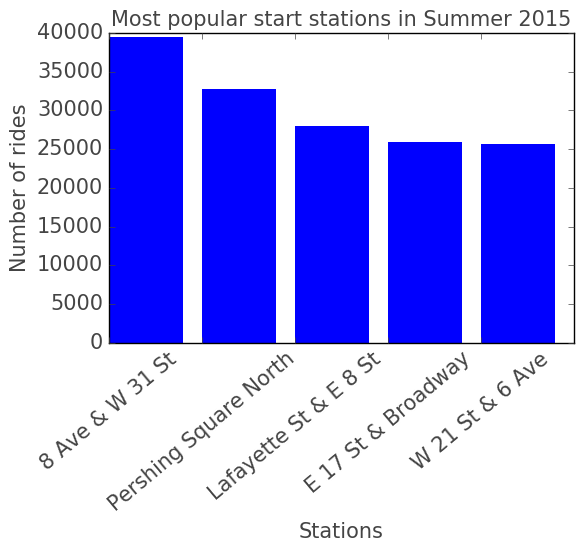

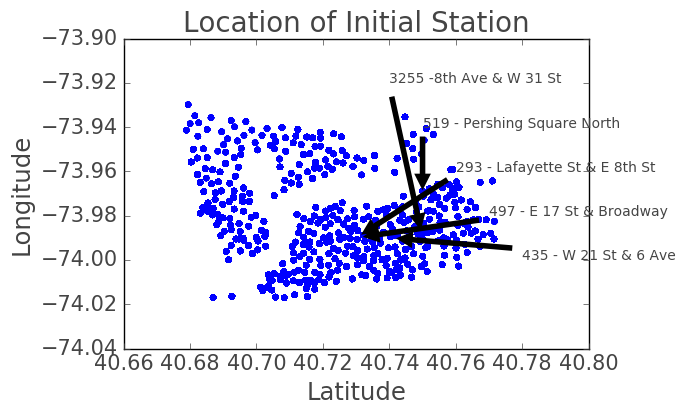

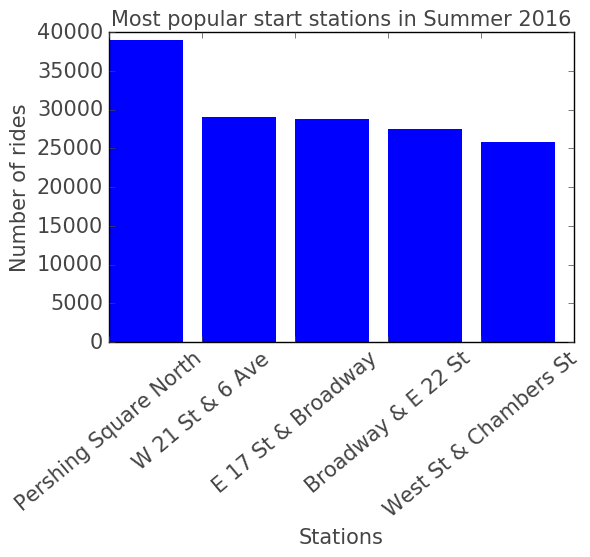

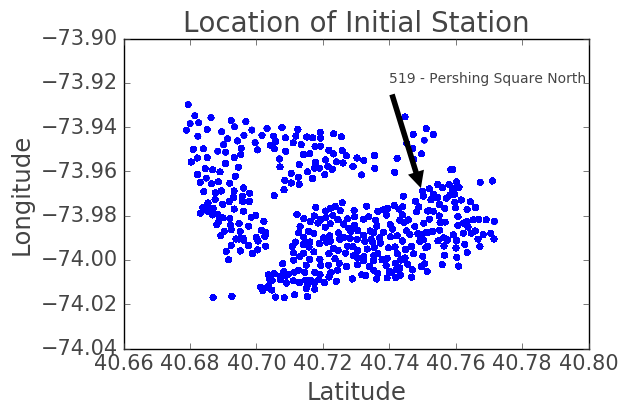

In [67]:
start_stations = summer2015.groupby('start station name')['start station id'].count().reset_index()
start_stations.columns = ['Start Station', 'Count']
start_stations = start_stations.sort_values(by='Count', ascending=False).head()

# create bar graph
plt.bar(list(range(len(start_stations))), start_stations['Count'], 
            tick_label=start_stations['Start Station'])
plt.xticks(rotation=40, fontsize = 15)
plt.xlabel('Stations', fontsize = 15)
plt.ylabel('Number of rides', fontsize = 15)
plt.title('Most popular start stations in Summer 2015', fontsize = 15)
plt.show()

#stationID = 3255
stationNum = '3255'
stationName = '8th Ave & W 31 St'
plt.scatter(summer2015['start station latitude'], summer2015['start station longitude'])
plt.title('Location of Initial Station')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.annotate('3255 -8th Ave & W 31 St', xy=(40.75, -73.99), xytext=(40.74, -73.92),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('519 - Pershing Square North', xy=(40.75, -73.97), xytext=(40.75, -73.94),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('293 - Lafayette St & E 8th St', xy=(40.73, -73.99), xytext=(40.76, -73.96),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('497 - E 17 St & Broadway', xy=(40.73, -73.99), xytext=(40.77, -73.98),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('435 - W 21 St & 6 Ave', xy=(40.74, -73.99), xytext=(40.78, -74),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.show()

start_stations1 = summer2016.groupby('start station name')['start station id'].count().reset_index()
start_stations1.columns = ['Start Station', 'Count']
start_stations1 = start_stations1.sort_values(by='Count', ascending=False).head()

# create bar graph
plt.bar(list(range(len(start_stations1))), start_stations1['Count'], 
            tick_label=start_stations1['Start Station'])
plt.xticks(rotation=40, fontsize = 15)
plt.xlabel('Stations', fontsize = 15)
plt.ylabel('Number of rides', fontsize = 15)
plt.title('Most popular start stations in Summer 2016', fontsize = 15)
plt.show()

#stationID = 519
stationNum1 = '519'
stationName1 = 'Pershing Square North'
plt.scatter(summer2015['start station latitude'], summer2015['start station longitude'])
plt.title('Location of Initial Station')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.annotate('519 - Pershing Square North', xy=(40.75, -73.97), xytext=(40.74, -73.92),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

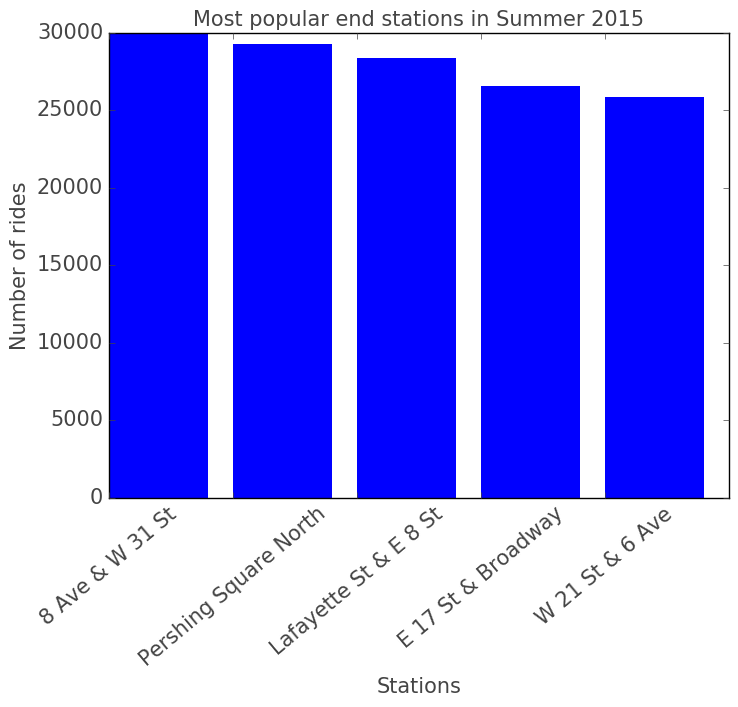

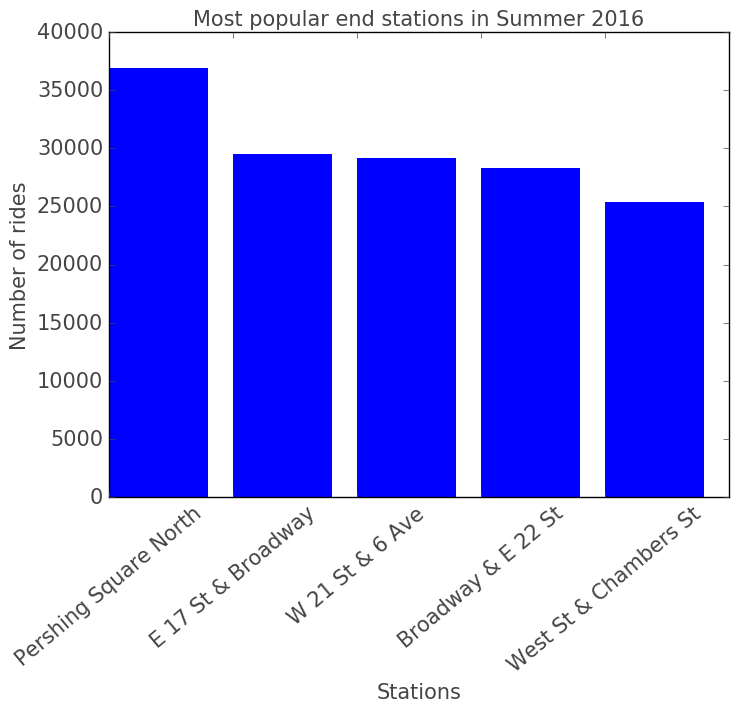

In [45]:
end_stations = summer2015.groupby('end station name')['end station id'].count().reset_index()
end_stations.columns = ['End Station', 'Count']
end_stations = end_stations.sort_values(by='Count', ascending=False).head()

# create bar graph
plt.bar(list(range(len(end_stations))), end_stations['Count'], 
            tick_label=end_stations['End Station'])
plt.xticks(rotation=40, fontsize = 15)
plt.xlabel('Stations', fontsize = 15)
plt.ylabel('Number of rides', fontsize = 15)
plt.title('Most popular end stations in Summer 2015', fontsize = 15)
plt.show()

end_stations1 = summer2016.groupby('end station name')['end station id'].count().reset_index()
end_stations1.columns = ['End Station', 'Count']
end_stations1 = end_stations1.sort_values(by='Count', ascending=False).head()

# create bar graph
plt.bar(list(range(len(end_stations1))), end_stations1['Count'], 
            tick_label=end_stations1['End Station'])
plt.xticks(rotation=40, fontsize = 15)
plt.xlabel('Stations', fontsize = 15)
plt.ylabel('Number of rides', fontsize = 15)
plt.title('Most popular end stations in Summer 2016', fontsize = 15)
plt.show()

Next is taking the week of July 4th and looking into that. I also want to attempt some linear regression(suggested by harris).

In [43]:
#Why is the whole month being taken into account? need to fix this
week_4th_ofjuly2015 = summer2015[((summer2015['starttime'] >= '7/1/2015') & (summer2015['starttime'] <= '7/8/2015')) |
                    ((summer2015['stoptime'] >= '7/8/2015') & (summer2015['stoptime'] <= '7/10/2015'))]
#week_4th_ofjuly2015.drop_duplicates('', inplace = True)
M = len(week_4th_ofjuly2015)
print('The rider count for the week of Independence Day: ' + str(M))
week_4th_ofjuly2015.head()

The rider count for the week of Independence Day: 845088


,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,roundtrip
810838,0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1,0
810839,1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1,0
810840,2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1,0
810841,3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1,0
810842,4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1,0
